In [1]:
#!pip install tensorflow
#!pip install matplotlib
#!pip install scikit-learn
#!pip install tqdm


## JUST FOR CUDA USERS:
#from tensorflow.keras import backend as K
import tensorflow as tf
#K.clear_session()
#tf.compat.v1.reset_default_graph()
tf.config.set_visible_devices([], 'GPU')

In [2]:
import warnings
warnings.filterwarnings("ignore")

## APRENDIZAJE FEDERADO.

El aprendizaje federado consiste en entrenar un modelo localmente con un subconjunto de datos, para después computar un modelo global (idéntico) que será desplegado como un servicio.

Para simular una situación de aprendizaje federado, usaremos la bien-conocida base de datos MNIST para interpretar número escritos a mano, y la dividiremos en cinco partes (en su caso, será en cuantos miembros de su equipo tengan).

In [4]:
import numpy as np

# Cargar archivo después del skf 
data = np.load('fold_1.npz')
x_fold = data['x']
y_fold = data['y']

In [5]:
from sklearn.model_selection import train_test_split

# Split en train y test 
x_train, x_test, y_train, y_test = train_test_split(x_fold, y_fold, test_size=0.2, random_state=42)
local_data = (x_fold, y_fold)

<Sequential name=sequential, built=True>
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.2516 - loss: 2.4681 - val_accuracy: 0.5704 - val_loss: 1.4622
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6717 - loss: 1.0341 - val_accuracy: 0.9038 - val_loss: 0.4553
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8348 - loss: 0.5889 - val_accuracy: 0.9358 - val_loss: 0.2882
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8822 - loss: 0.4259 - val_accuracy: 0.9513 - val_loss: 0.2082
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9017 - loss: 0.3481 - val_accuracy: 0.9583 - val_loss: 0.1737
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       236
           1       0.94      0.99      0.97       269
           2       0.97      0.93      0.95       223
           3       0.96      0.94      0.95       229
        

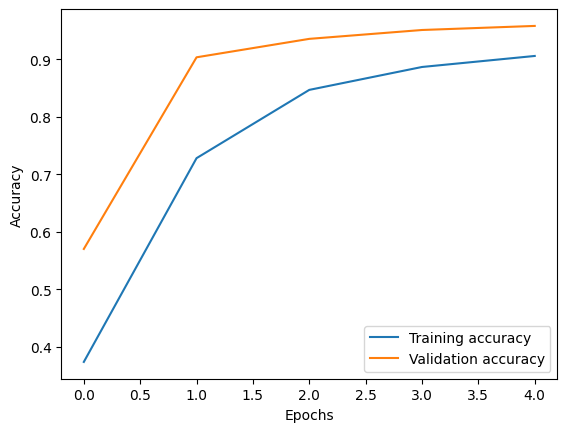

In [6]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
def train_and_verify(local_model, local_data, epochs, x_test, y_test, save_name):

    print(local_model)

    history = local_model.fit(local_data[0], local_data[1], epochs=epochs, validation_data=(x_test, y_test))
    y_pred = local_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    local_model.save(save_name)

# Entrenamiento local 
# TheModel2 - David
# TheModel1 - Dany
from TheModel import build  # noqa: E402  #Aquí cambias el modelo 
#from tqdm import tqdm  # noqa: E402

num_modelo = 1   # Cambiar el número de modelo para cada computadora
local_model = build.build_it()
train_and_verify(local_model, local_data, 5, x_test, y_test, f"lmodel_{num_modelo}.keras") 